In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [3]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'location', 'kg', 'mood', 'rm',
       'stable', 'max_full', 'total', 'total6', '4', '5a', '5b', '5c', '6a',
       '6a+', '6b', '6b+', '6c', '6c+', '7a', '7a+', '7b', '7b+', '7c', '7c+',
       '8a'],
      dtype='object')

In [4]:
sessions.head()

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6b+,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,0.95,6a,6b+,...,4.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,0.95,5c,6b+,...,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,0.60,6b,6b+,...,2.0,0.25,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.0
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,0.50,6b,6b,...,0.0,0.00,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,0.50,5c,6a+,...,0.0,0.00,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
scores_translator = {
    '4': 4,
    '5a': 8,
    '5b': 9,
    '5c': 10,
    '6a': 20,
    '6a+': 21,
    '6b': 30,
    '6b+': 40,
    '6c': 45,
    '6c+': 50,
    '7a': 80,
    '7a+': 90,
}

def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)



In [6]:
scores = sessions.apply(calc_score, axis=1)
sessions['scores'] = scores
sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,0.95,6a,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.00
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,0.95,5c,6b+,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.00
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,0.60,6b,6b+,...,0.25,0.00,0.0,1.5,0.0,0.0,0.0,0.0,0.0,508.25
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,0.50,6b,6b,...,0.00,0.50,0.5,0.0,0.0,0.0,0.0,0.0,0.0,430.00
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,0.50,5c,6a+,...,0.00,0.00,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.00
5,2018-03-31,doripa,1,project,bf,78.0,0.0,0.60,6b,6b+,...,0.00,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,619.50
6,2018-02-04,doripa,1,project,bb1,78.0,0.0,0.40,6b,6c+,...,0.00,1.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,678.50
7,2018-04-04,doripa,1,project,bf,78.0,0.0,0.40,6b,6c,...,1.00,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,606.00
8,2018-06-04,doripa,1,arc,bf,78.0,0.0,0.20,5c,5c,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,258.00
9,2018-06-04,doripa,1,project,bb2,78.0,0.0,0.50,6b,6c+,...,5.00,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,984.00


In [7]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

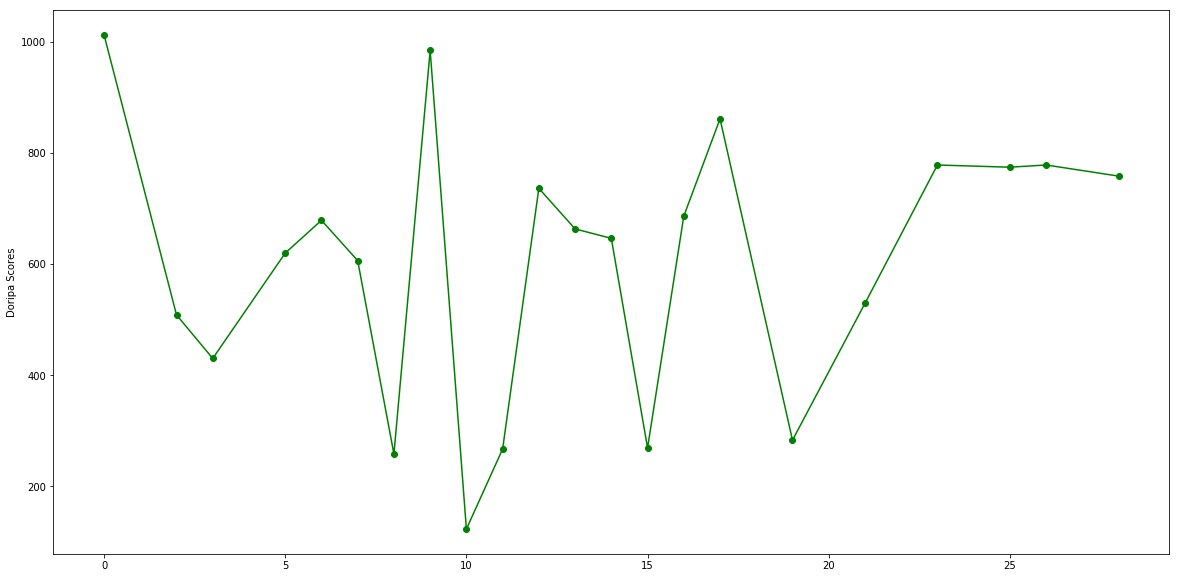

In [8]:
plt.figure(figsize=(20,10))
plt.plot(doripa.scores, marker='o', color='green')
plt.ylabel('Doripa Scores')
plt.show()

In [9]:
sunshine_sessions

,date,monkey,cycle,phase,location,kg,mood,rm,stable,max_full,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,0.95,5c,6b+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,0.50,5c,6a+,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,184.0
18,2018-04-28,sunshine,2,base,bb1,59.0,0.0,0.60,5c,6a+,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118.0
20,2018-01-05,sunshine,2,base,bf,59.0,6.0,0.60,5a,5c,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,173.0
22,2018-03-05,sunshine,2,base,bb2,59.0,7.0,0.65,5c,6a,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.0
24,2018-06-05,sunshine,2,base,bb2,59.0,7.0,0.70,5b,6a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0
27,2018-08-05,sunshine,2,base,bb2,59.0,7.0,0.60,5c,6a,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,259.0
29,2018-11-05,sunshine,2,base,bb1,59.0,4.0,0.70,5c,6a,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,149.0


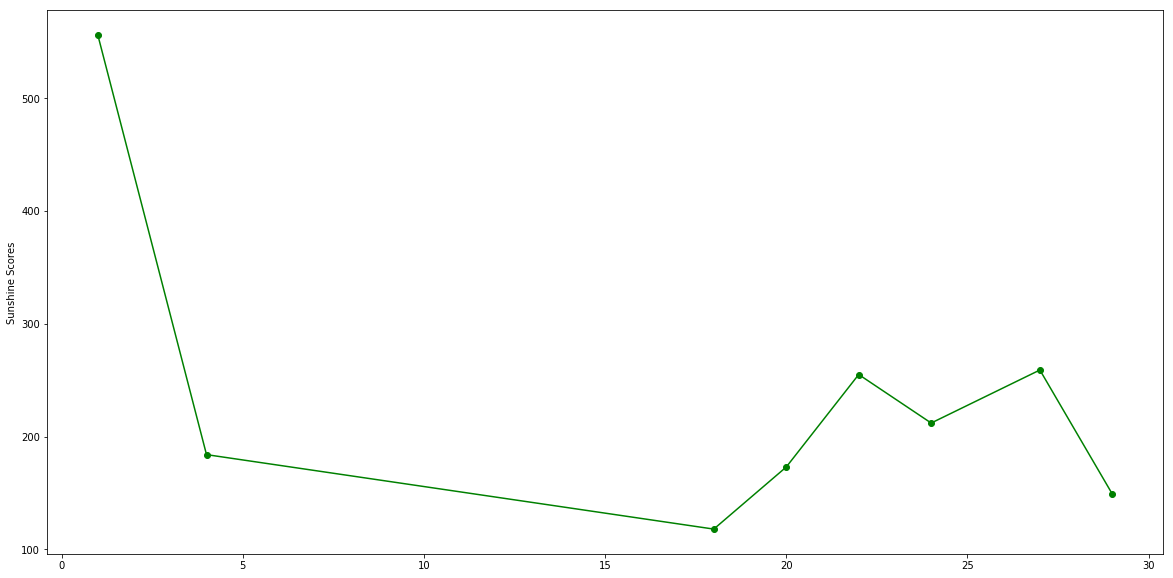

In [10]:
plt.figure(figsize=(20,10))
plt.plot(sunshine_sessions.scores,  marker='o', color='green')
plt.ylabel('Sunshine Scores')
plt.show()

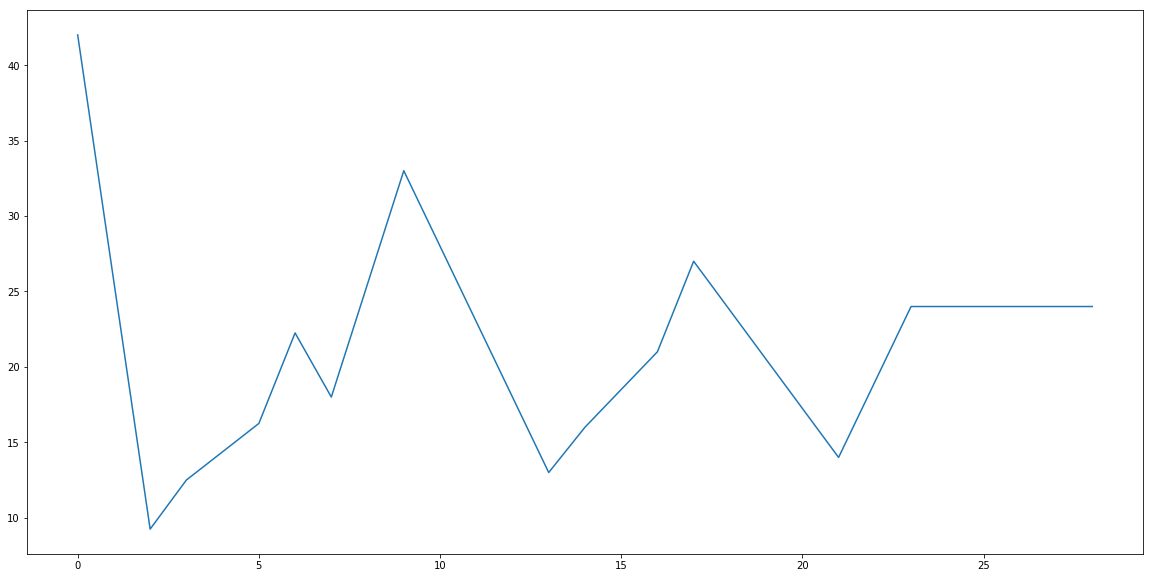

In [11]:
no_arcing = doripa[doripa.phase != 'arc']
plt.figure(figsize=(20,10))
plt.plot(no_arcing['total6'])
plt.show()

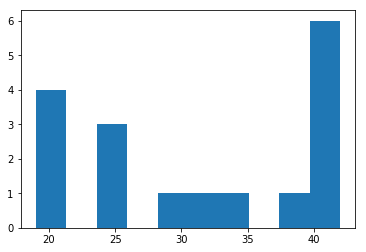

In [12]:
plt.hist(no_arcing['total'])
plt.show()

In [13]:
doripa.corr()

,cycle,kg,mood,rm,total,total6,4,5a,5b,5c,...,6c,6c+,7a,7a+,7b,7b+,7c,7c+,8a,scores
cycle,1.000000,-0.524404,0.759521,0.054836,0.414535,0.240525,0.418330,0.127211,0.028402,0.047264,...,0.154442,-0.186039,-0.281343,-0.062897,NaN,NaN,NaN,NaN,NaN,0.249650
kg,-0.524404,1.000000,-0.807870,-0.325902,-0.514884,-0.272882,-0.773033,-0.333916,0.101100,0.055079,...,-0.109067,0.250868,0.212454,0.153923,NaN,NaN,NaN,NaN,NaN,-0.278824
mood,0.759521,-0.807870,1.000000,0.166422,0.540068,0.225332,0.682078,0.381513,0.016325,0.060800,...,0.092193,-0.363345,-0.246721,-0.109315,NaN,NaN,NaN,NaN,NaN,0.233529
rm,0.054836,-0.325902,0.166422,1.000000,0.345175,0.727962,0.314094,-0.414040,-0.575301,-0.622417,...,0.300700,0.248762,0.166809,0.140525,NaN,NaN,NaN,NaN,NaN,0.746466
total,0.414535,-0.514884,0.540068,0.345175,1.000000,0.579044,0.410736,0.389847,0.093444,0.169735,...,0.187330,-0.102012,-0.468369,-0.367522,NaN,NaN,NaN,NaN,NaN,0.573267
total6,0.240525,-0.272882,0.225332,0.727962,0.579044,1.000000,0.217685,-0.467754,-0.666876,-0.621850,...,0.426292,0.316528,-0.024535,-0.162072,NaN,NaN,NaN,NaN,NaN,0.966152
4,0.418330,-0.773033,0.682078,0.314094,0.410736,0.217685,1.000000,0.254741,-0.095052,-0.197719,...,0.007753,-0.200124,-0.169480,-0.122788,NaN,NaN,NaN,NaN,NaN,0.217359
5a,0.127211,-0.333916,0.381513,-0.414040,0.389847,-0.467754,0.254741,1.000000,0.670022,0.775207,...,-0.201287,-0.497381,-0.500733,-0.151805,NaN,NaN,NaN,NaN,NaN,-0.445745
5b,0.028402,0.101100,0.016325,-0.575301,0.093444,-0.666876,-0.095052,0.670022,1.000000,0.810212,...,-0.377065,-0.274765,-0.420635,-0.108376,NaN,NaN,NaN,NaN,NaN,-0.660687
5c,0.047264,0.055079,0.060800,-0.622417,0.169735,-0.621850,-0.197719,0.775207,0.810212,1.000000,...,-0.258209,-0.395682,-0.316891,-0.319076,NaN,NaN,NaN,NaN,NaN,-0.600926


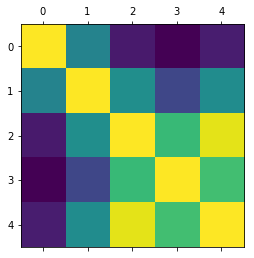

In [14]:
plt.matshow(doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr());

In [15]:
doripa[['mood', 'total', 'total6', 'rm', 'scores']].corr()

,mood,total,total6,rm,scores
mood,1.000000,0.540068,0.225332,0.166422,0.233529
total,0.540068,1.000000,0.579044,0.345175,0.573267
total6,0.225332,0.579044,1.000000,0.727962,0.966152
rm,0.166422,0.345175,0.727962,1.000000,0.746466
scores,0.233529,0.573267,0.966152,0.746466,1.000000


In [16]:
doripa['total'].corr(doripa['total6'])

0.57904415985181323

In [17]:
doripa['total'].corr(doripa['scores'])

0.57326746186837363

In [18]:
doripa['scores'].corr(doripa['rm'])

0.74646645233780906

In [19]:
doripa['scores'].corr(doripa['total6'])

0.96615176544450465

In [20]:
sunshine_sessions.corr()['scores']

cycle    -0.592191
kg        0.592191
mood     -0.207573
rm        0.828806
total     0.924753
total6    0.979547
4        -0.389431
5a        0.762048
5b        0.825597
5c        0.267816
6a        0.901051
6a+       0.717118
6b        0.419617
6b+       0.714102
6c        0.084278
6c+            NaN
7a       -0.159633
7a+            NaN
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64

In [21]:
doripa.corr()['scores']

cycle     0.249650
kg       -0.278824
mood      0.233529
rm        0.746466
total     0.573267
total6    0.966152
4         0.217359
5a       -0.445745
5b       -0.660687
5c       -0.600926
6a        0.826834
6a+       0.745405
6b        0.726895
6b+       0.665980
6c        0.491257
6c+       0.374223
7a        0.105023
7a+      -0.071270
7b             NaN
7b+            NaN
7c             NaN
7c+            NaN
8a             NaN
scores    1.000000
Name: scores, dtype: float64